In [1]:
# !pip install gdal
# !pip install rasterio
!pip install geojson
import warnings


In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
from osgeo import gdal
import numpy as np
import statistics
import rasterio
from rasterio import features
import matplotlib.pyplot as plt
from rasterio.plot import plotting_extent
import geopandas as gpd
import fiona
from rasterio.crs import CRS
from rasterio.mask import mask
import rioxarray
import json
import geojson


In [ ]:
dataset1 = gdal.Open(r'/content/drive/MyDrive/WQA_data/T_12-09-2022.tiff')
dataset2 = gdal.Open(r'/content/drive/MyDrive/WQA_data/T_16-02-2023.tiff')
dataset3 = gdal.Open(r'/content/drive/MyDrive/WQA_data/T_21-04-2023.tiff')



In [ ]:
print(dataset1.RasterCount)

9


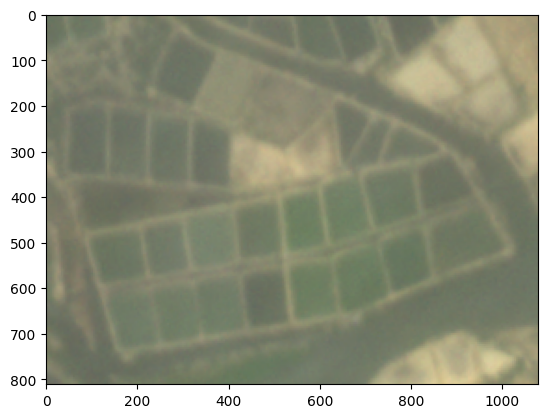

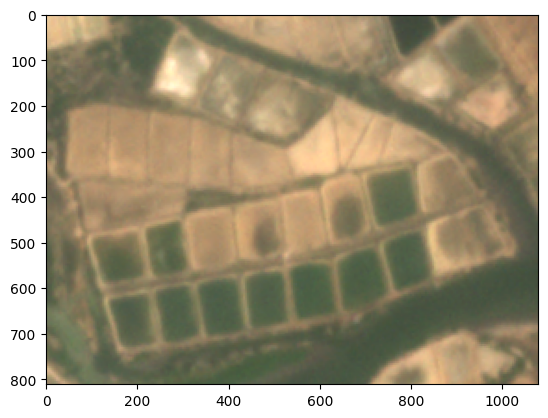

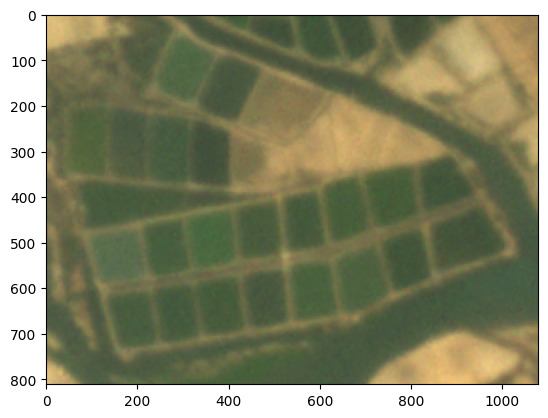

In [ ]:
def visualize(dataset):
  band1 = dataset.GetRasterBand(6).ReadAsArray() # Red channel
  band2 = dataset.GetRasterBand(4).ReadAsArray() # Green channel
  band3 = dataset.GetRasterBand(2).ReadAsArray() # Blue channel

  img = np.dstack((band1, band2, band3))
  f = plt.figure()
  plt.imshow(img)
  # plt.savefig('Tiff.png')
  plt.show()

visualize(dataset1)
visualize(dataset2)
visualize(dataset3)

In [ ]:
def NDVI(dataset):
  band1 = dataset.GetRasterBand(6).ReadAsArray()
  band2 = dataset.GetRasterBand(8).ReadAsArray()
  ndvi = (band2 -band1)/(band2 +band1)
  return ndvi

def NDCI(dataset):
  band1 = dataset.GetRasterBand(7).ReadAsArray() #708
  band2 = dataset.GetRasterBand(6).ReadAsArray()#665
  ndci = (band1 -band2)/(band2 +band1)
  return ndci




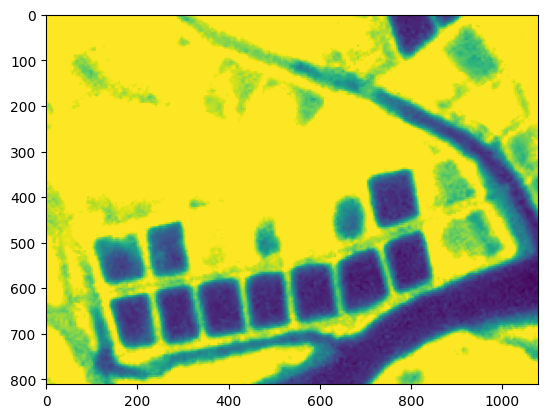

In [ ]:
nir = dataset2.GetRasterBand(8).ReadAsArray()
# filterednir = nir[(nir[:,0] < 200)]
f = plt.figure()
plt.imshow(nir)
# plt.savefig('Tiff.png')
plt.show()

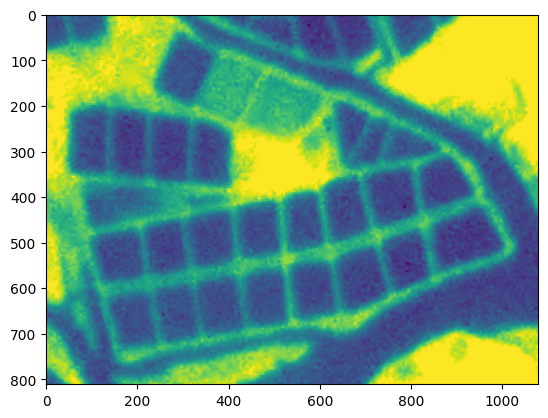

In [ ]:
nir = dataset1.GetRasterBand(8).ReadAsArray()
# filterednir = nir[(nir[:,0] < 200)]
f = plt.figure()
plt.imshow(nir)
# plt.savefig('Tiff.png')
plt.show()

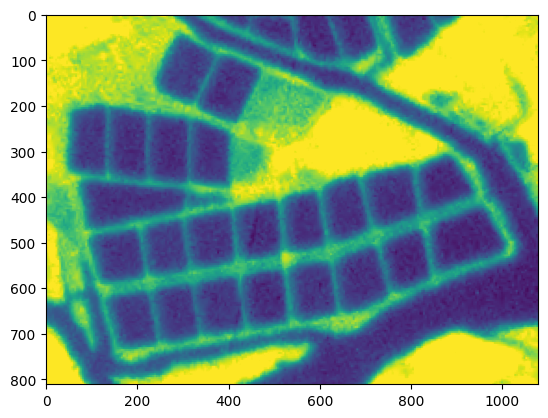

In [ ]:
nir = dataset3.GetRasterBand(8).ReadAsArray()
# filterednir = nir[(nir[:,0] < 200)]
f = plt.figure()
plt.imshow(nir)
# plt.savefig('Tiff.png')
plt.show()

<ipython-input-7-aa0e28b41cf4>:4: RuntimeWarning: divide by zero encountered in true_divide
  ndvi = (band2 -band1)/(band2 +band1)


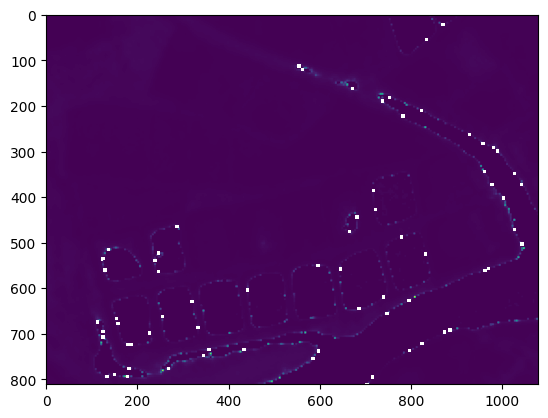

In [ ]:
ndvi = NDVI(dataset2)
# filteredNDVI = ndvi[((ndvi[:,0] > min) & (ndvi[:,0] < max))]
f = plt.figure()
plt.imshow(ndvi)
# plt.savefig('Tiff.png')
plt.show()

In [ ]:
ndvi.min()

0.0

<ipython-input-7-aa0e28b41cf4>:10: RuntimeWarning: divide by zero encountered in true_divide
  ndci = (band1 -band2)/(band2 +band1)


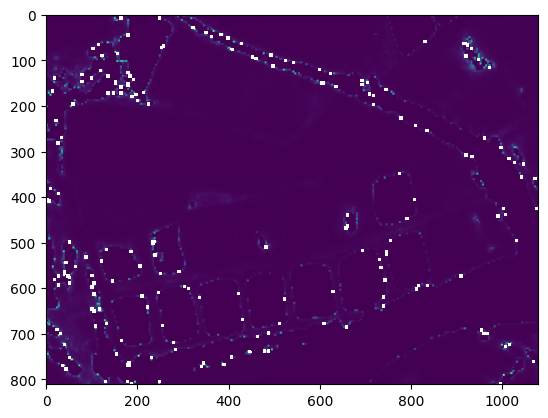

In [ ]:

ndci = NDCI(dataset2)
# filteredNDVI = NDCI[((ndvi[:,0] > min) & (ndvi[:,0] < max))]
f = plt.figure()
plt.imshow(ndci)
# plt.savefig('Tiff.png')
plt.show()

In [ ]:
with rasterio.open('/content/drive/MyDrive/WQA_data/T_16-02-2023.tiff') as src:
    band=src.read()

    mask = band!= 0
    shapes = rasterio.features.shapes(band, mask=mask, transform=src.transform)

fc = ({"geometry": shape, "properties": {"value": value}} for shape, value in shapes)

gpd.GeoDataFrame.from_features(fc).to_json()

Output hidden; open in https://colab.research.google.com to view.

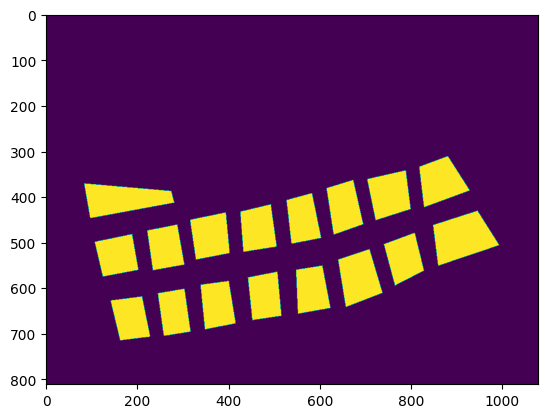

In [ ]:

# load in the geojson file
with open("/content/drive/MyDrive/WQA_data/ConcenerdPond.geojson") as igj:
    data = json.load(igj)

# crs = data["properties"]["name"]
crs = "EPSG:4326" # if GDAL 2
geoms = [feat["geometry"] for feat in data["features"]]

# create empty mask raster based on the input raster
rds = rioxarray.open_rasterio("/content/drive/MyDrive/WQA_data/T_16-02-2023.tiff").isel(band=7)
rds.values[:] = 1
rds.rio.write_nodata(0, inplace=True)

# clip the raster to the mask
clipped = rds.rio.clip(geoms, crs, drop=False)
f = plt.figure()
# ds2 = clipped.where(clipped > 200, drop=True)
plt.imshow(clipped)
# plt.savefig('Tiff.png')
plt.show()

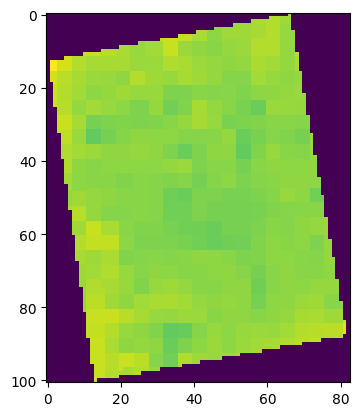

Fully filled


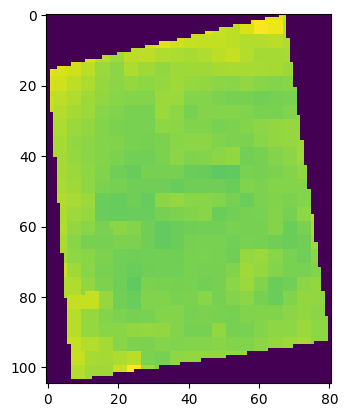

Fully filled


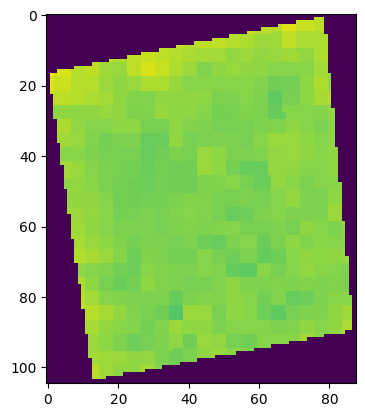

Fully filled


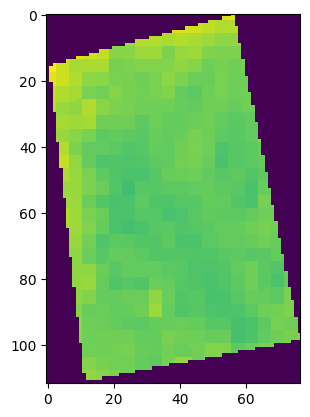

Fully filled


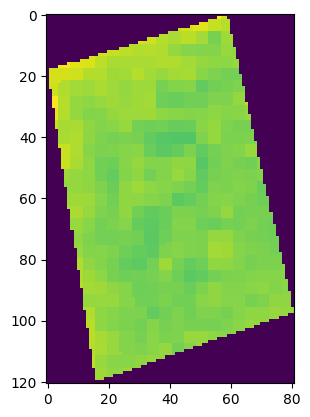

Fully filled


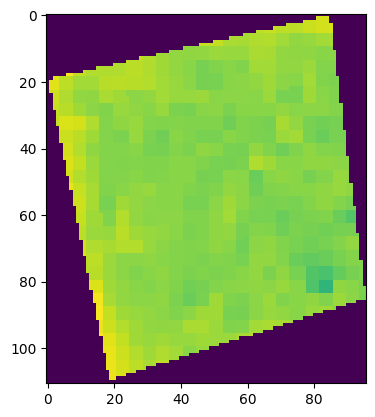

Fully filled


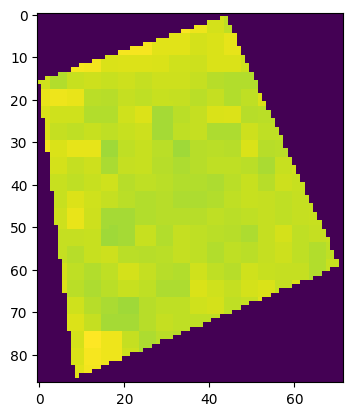

Fully filled


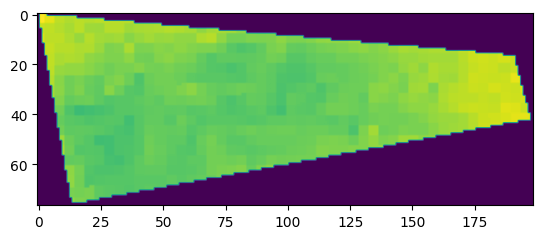

Fully filled


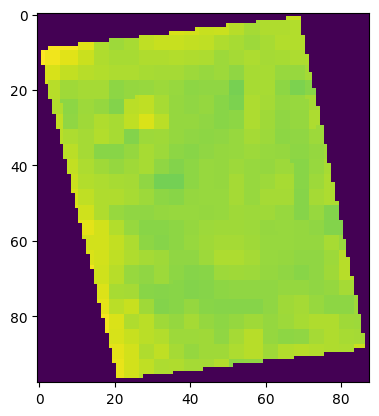

Fully filled


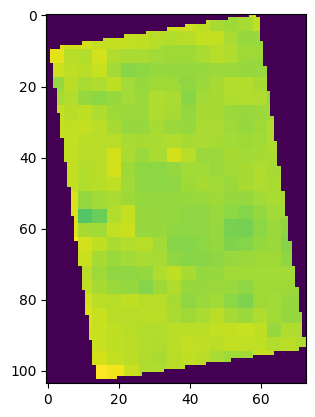

Fully filled


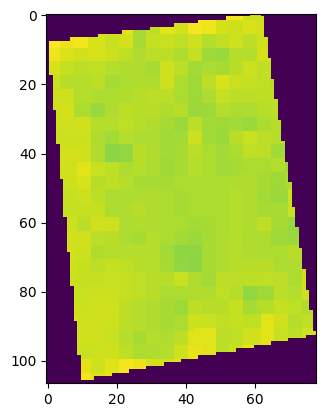

Fully filled


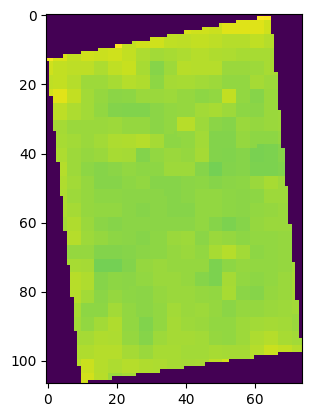

Fully filled


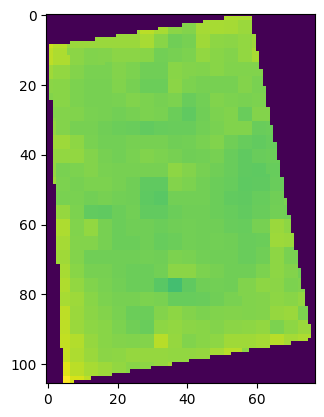

Fully filled


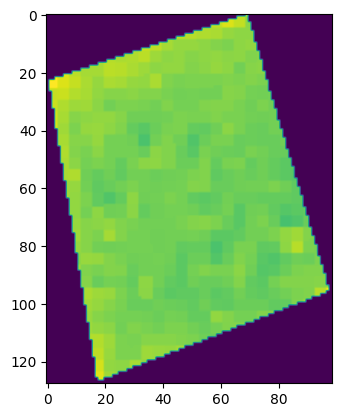

Fully filled


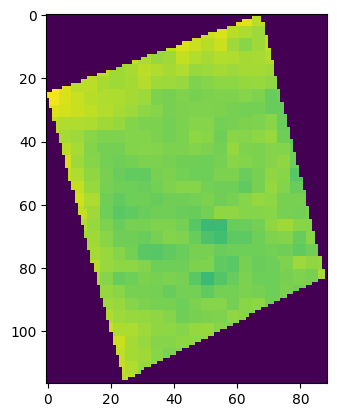

Fully filled


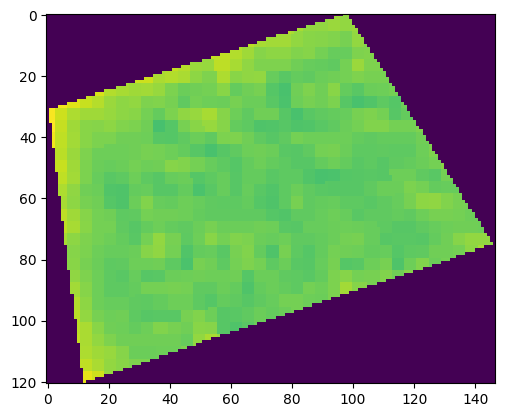

Fully filled


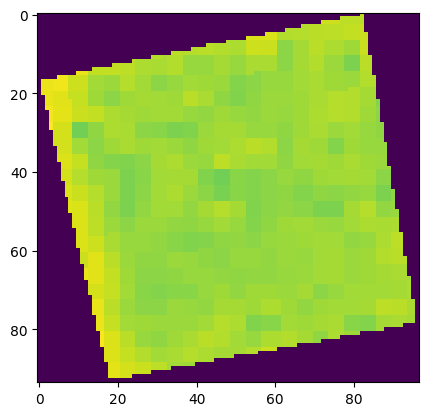

Fully filled


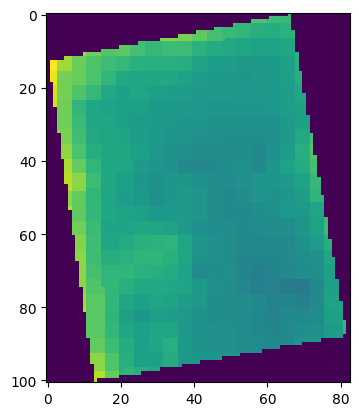

Fully filled


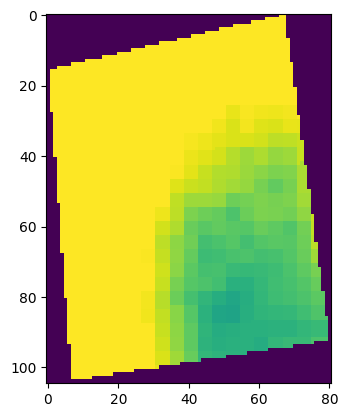

0.23915343915343915 0.1789535567313345 0.5818930041152264
empty


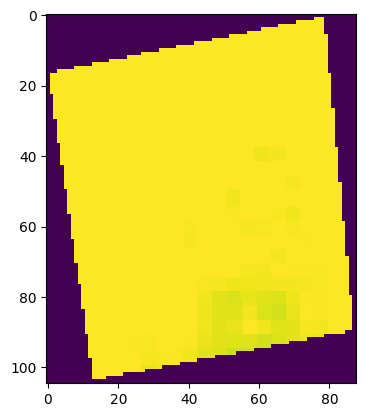

0.25573593073593076 0.0 0.7442640692640693
empty


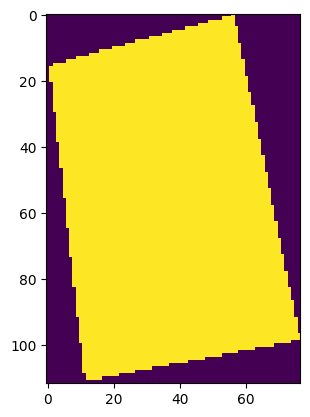

0.29417903525046385 0.0 0.7058209647495362
empty


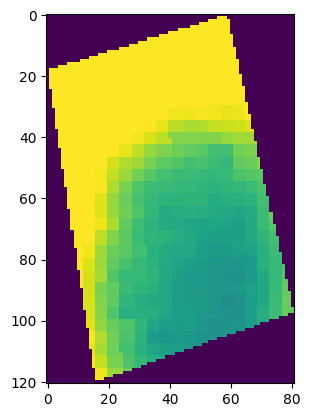

0.334149576573819 0.3359861238649117 0.3298642995612693
partially filled


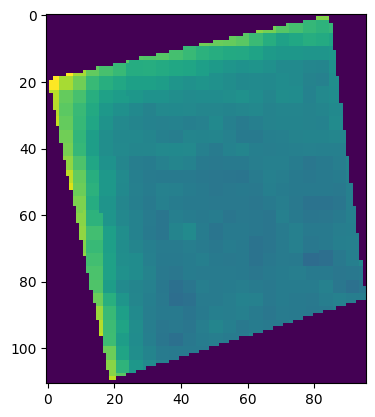

Fully filled


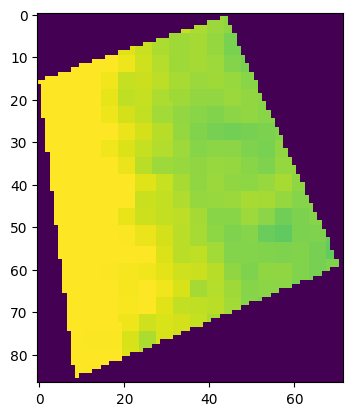

0.3936781609195402 0.008780332056194126 0.5975415070242657
empty


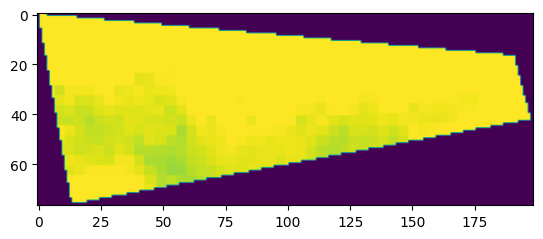

0.3701625008157671 0.0 0.6298374991842328
empty


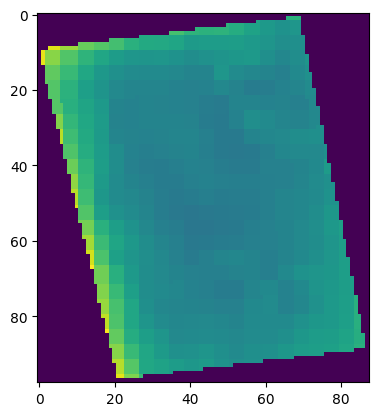

Fully filled


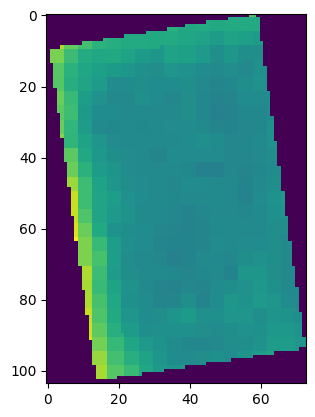

Fully filled


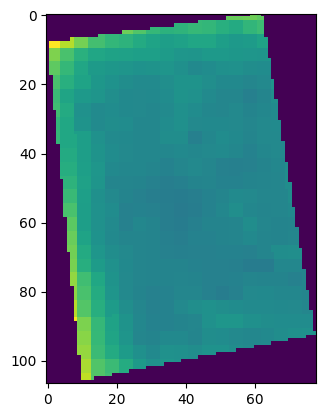

Fully filled


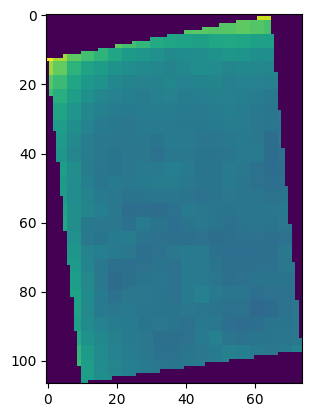

Fully filled


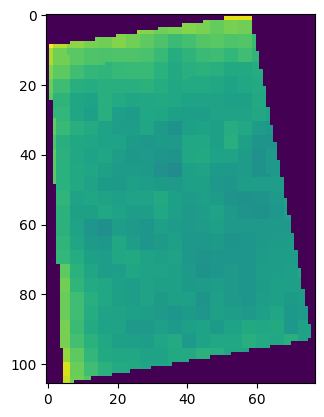

Fully filled


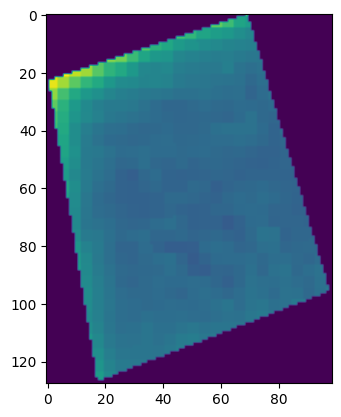

Fully filled


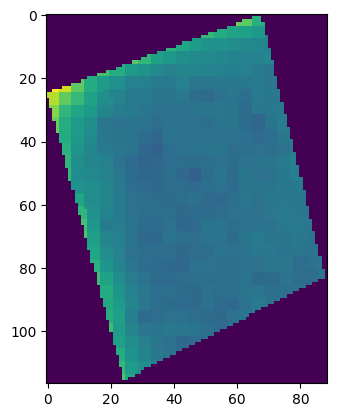

Fully filled


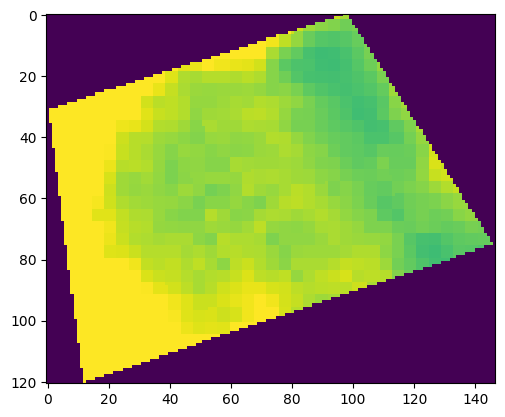

0.4007421150278293 0.09810535784561758 0.5011525271265531
empty


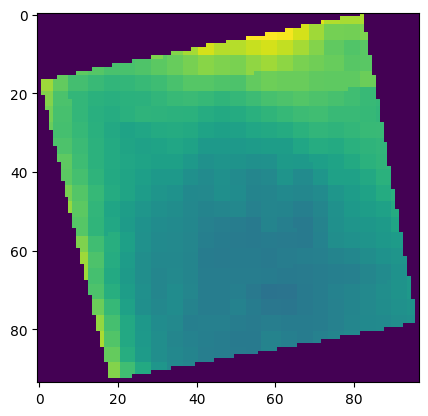

Fully filled


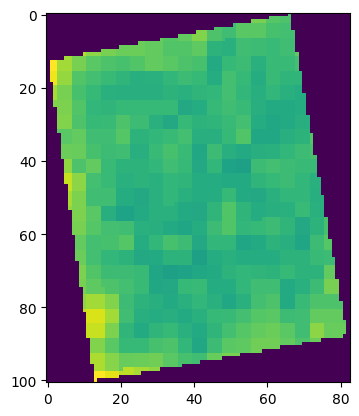

Fully filled


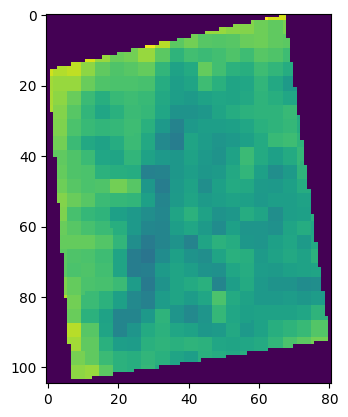

Fully filled


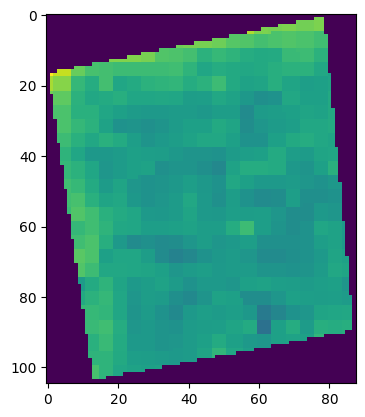

Fully filled


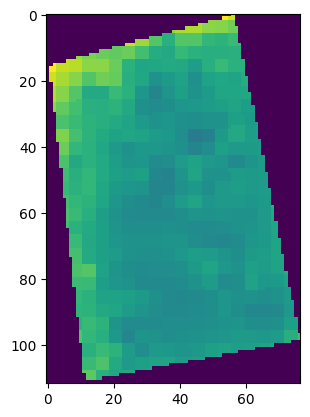

Fully filled


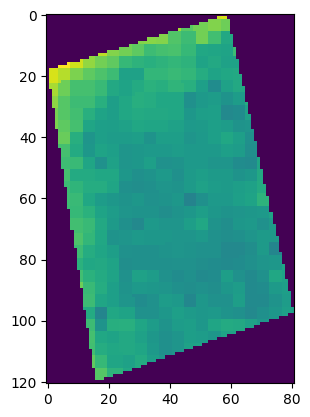

Fully filled


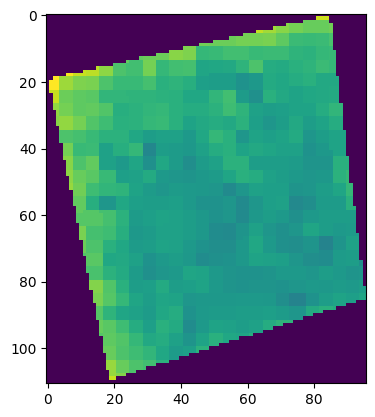

Fully filled


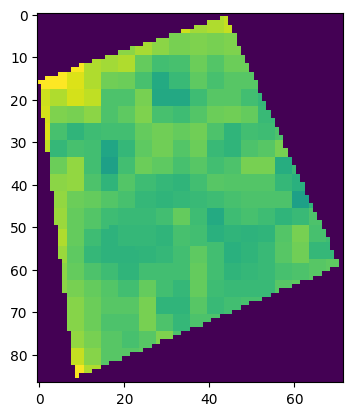

Fully filled


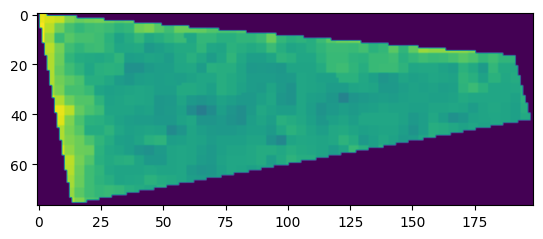

Fully filled


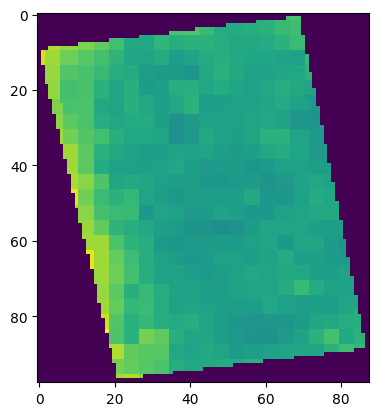

Fully filled


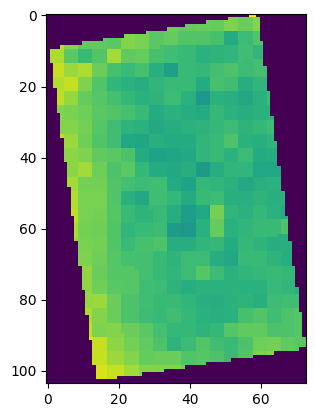

Fully filled


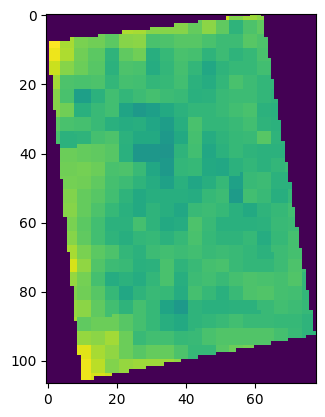

Fully filled


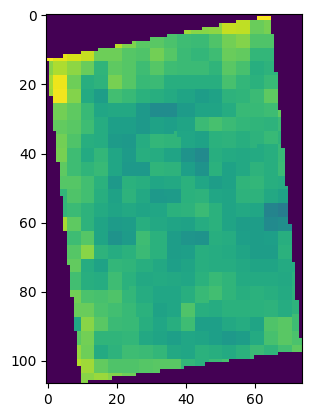

Fully filled


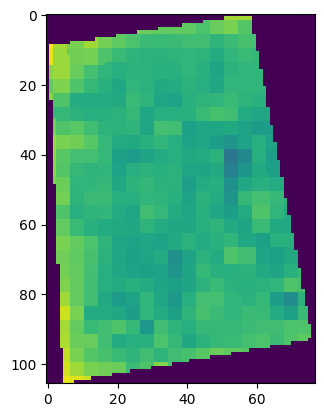

Fully filled


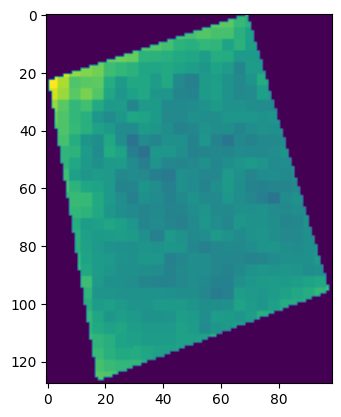

Fully filled


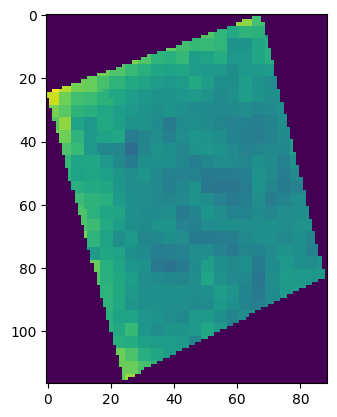

Fully filled


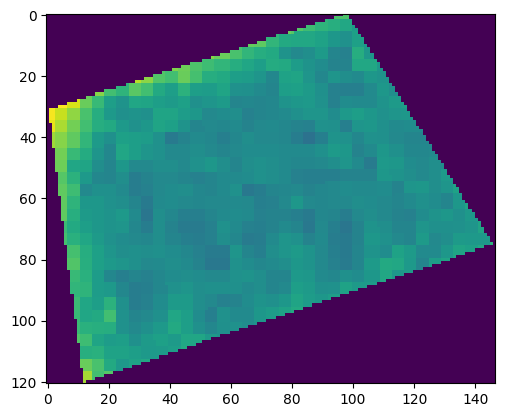

Fully filled


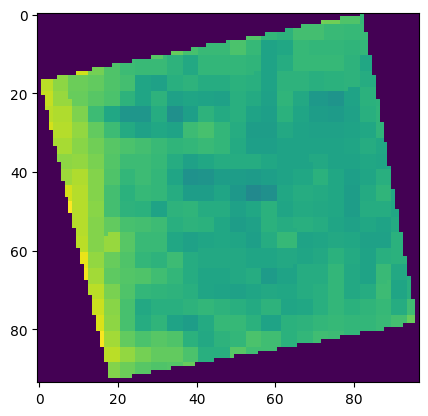

Fully filled


In [ ]:
# geoms = [feature["geometry"] for feature in gj['features']]
# names = [feature["geometry"] for feature in gj['features']]

with open(f'/content/drive/MyDrive/WQA_data/CroppedPond.geojson') as f:
    gj = geojson.load(f)

files = [r"/content/drive/MyDrive/WQA_data/T_12-09-2022.tiff"\
         ,r"/content/drive/MyDrive/WQA_data/T_16-02-2023.tiff"\
         ,r"/content/drive/MyDrive/WQA_data/T_21-04-2023.tiff"]
Tresults = []
for f in files:
  results = {}
  for i in gj['features']:
      name = (i['properties']['Pond'])
      with rasterio.open(f) as src:
        out_image, out_transform = rasterio.mask.mask(src, [i['geometry']], crop=True)
        reshaped_image = np.transpose(out_image, (1, 2, 0))
        # if name in ['T_B3', 'T_B4', 'T_B5', 'T_B2','T_C8',"T_A1"]:
          # print(name)
          # plt.figure()
        array = reshaped_image[:,:,7]
        # print(array.shape)
        # plt.hist(array, bins='auto')
        # plt.show()
        plt.figure()
        plt.imshow(array)
        plt.show()
        nir = reshaped_image[:,:,7]
        totlalen = len(nir)*len(nir[0])
        if np.mean(nir)<125 :
          print('Fully filled')
        else:
          p1 = len(nir[(nir < 125)])/totlalen
          p2= len(nir[(nir >= 125) & (nir <= 200)])/totlalen
          p3 = len(nir[(nir > 200)])/totlalen
          print(p1,p2,p3)
          if p2<p3 or p2<p1:
            if p1 <p3:
              print('empty')
            if p>p3:
              print('partially filled')
          if p1<p2 or p3<p2:
            if p2 <p3:
              print('partially filled')
            if p2>p1:
              print('partially empty')
        #   if p3 > p1:
        #     if p3 > p2 and p2 != 0:
        #       print("empty")
        #     else:
        #       if p2 > p1:
        #         print("partially filled")
        #       else:
        #         print("partially empty")
        #   if p1 > p3:
        #     if p1 > p2:
        #       print("fully filled")
        #     else:
        #       print("partially filled")
          # if p1+p2>p3:
          #   if p2>p1:print('partially filled')
          #   else:print('partially empty')
          # if p1 <p3:
          #   if p1<p2+p3:
          #     if p2>p3:print('partially empty')
          #     else:
          #       print('empty')
          # if p3>p2:
          #   if p1+p2<p3:
          #     if p2<p1 :
          #         print('partially filled ')
          #     else:
          #       print('empty')
          # else:
          #   print(name,'not considered')

        max = np.max(reshaped_image[:,:,7])
        min = np.min(reshaped_image[:,:,7])
        avg = np.mean(reshaped_image[:,:,7])
        std  = np.std(reshaped_image[:,:,7])
        results.update( {f"{i['properties']['Pond']}": [max,min,avg,std]})
        out_meta = src.meta
  Tresults.append(results)
    # out_meta.update({"driver": "GTiff",
    #              "height": out_image.shape[1],
    #              "width": out_image.shape[2],
    #              "transform": out_transform})

    # with rasterio.open(f"{i['properties']['Pond']}.tif", "w", **out_meta) as dest:
    #     dest.write(out_image)

In [ ]:
reshaped_image

In [ ]:
Tresults ## TB6, TB4, C8,A1,B1  TB3 TB5

[{'T_B7': [175, 0, 106.4212095908386, 65.42118170910341],
  'T_B5': [184, 0, 115.38259847148736, 64.992382337122],
  'T_B6': [181, 0, 110.6254329004329, 65.0444159131225],
  'T_B4': [199, 0, 109.16906307977736, 70.88080183576506],
  'T_B3': [182, 0, 99.41791653912865, 70.65912098097364],
  'T_B2': [174, 0, 100.55762012012012, 67.09692843974219],
  'T_B1': [156, 0, 86.10791826309068, 69.4599274470808],
  'T_C8': [212, 0, 106.29237094563727, 82.0802529792448],
  'T_A8': [176, 0, 106.88079777365492, 69.08588254811986],
  'T_A7': [175, 0, 112.6290832455216, 66.8769743791541],
  'T_A6': [168, 0, 113.38269829858615, 64.80364049517239],
  'T_A5': [178, 0, 118.90363728214196, 62.48003821180819],
  'T_A4': [184, 0, 113.12337662337663, 63.25222335104755],
  'T_A3': [183, 0, 93.59264520202021, 70.76408894552932],
  'T_A2': [176, 0, 87.46326707000864, 70.45292359761166],
  'T_A1': [181, 0, 85.04671951425198, 69.78149650125181],
  'T_B8': [173, 0, 105.16472910726037, 67.99465046187406]},
 {'T_B7': 

In [ ]:
results

{'T_B8': [255, 0, 103.98837464356218, 72.7758209195815],
 'T_B7': [225, 0, 93.96636049147084, 60.21544336716621],
 'T_B5': [255, 0, 175.63057025279247, 102.53653956574739],
 'T_B6': [255, 0, 189.0410173160173, 110.84068822442703],
 'T_B4': [255, 0, 179.98434601113172, 116.19657234094215],
 'T_B3': [255, 0, 135.1568207325783, 102.742730959803],
 'T_B2': [230, 0, 77.28753753753753, 55.36376512513554],
 'T_B1': [255, 0, 138.5448798988622, 114.61816470837881],
 'T_C8': [255, 0, 157.32095542648307, 120.78189855931346],
 'T_A8': [221, 0, 79.01658163265306, 53.89074814152741],
 'T_A7': [193, 0, 75.48906743940991, 47.12939988571522],
 'T_A6': [198, 0, 76.01294033069733, 45.83892578883969],
 'T_A5': [235, 0, 79.72972972972973, 44.76635144249304],
 'T_A4': [160, 0, 72.81144327370743, 41.77547425057383],
 'T_A3': [254, 0, 62.97419507575758, 50.708531412076226],
 'T_A2': [237, 0, 60.230385095553636, 50.8675266082755],
 'T_A1': [255, 0, 133.88750210828132, 110.83905345918284]}

In [ ]:
results = {}
for i in gj['features']:
  # print(i['properties']['Pond'])
  with rasterio.open(r"/content/drive/MyDrive/WQA_data/T_12-09-2022.tiff") as src:
    out_image, out_transform = rasterio.mask.mask(src, [i['geometry']], crop=True)
    reshaped_image = np.transpose(out_image, (1, 2, 0))
    max = np.max(reshaped_image[:,:,7])
    min = np.min(reshaped_image[:,:,7])
    avg = np.mean(reshaped_image[:,:,7])
    std  = np.std(reshaped_image[:,:,7])
    results.update( {f"{i['properties']['Pond']}": [max,min,avg,std]})
    out_meta = src.meta

In [ ]:
results

{'T_B8': [173, 0, 105.16472910726037, 67.99465046187406],
 'T_B7': [175, 0, 106.4212095908386, 65.42118170910341],
 'T_B5': [184, 0, 115.38259847148736, 64.992382337122],
 'T_B6': [181, 0, 110.6254329004329, 65.0444159131225],
 'T_B4': [199, 0, 109.16906307977736, 70.88080183576506],
 'T_B3': [182, 0, 99.41791653912865, 70.65912098097364],
 'T_B2': [174, 0, 100.55762012012012, 67.09692843974219],
 'T_B1': [192, 0, 87.69192477876106, 72.15107511483775],
 'T_C8': [212, 0, 106.29237094563727, 82.0802529792448],
 'T_A8': [176, 0, 106.88079777365492, 69.08588254811986],
 'T_A7': [175, 0, 112.6290832455216, 66.8769743791541],
 'T_A6': [168, 0, 113.38269829858615, 64.80364049517239],
 'T_A5': [178, 0, 118.90363728214196, 62.48003821180819],
 'T_A4': [184, 0, 113.12337662337663, 63.25222335104755],
 'T_A3': [183, 0, 93.59264520202021, 70.76408894552932],
 'T_A2': [176, 0, 87.46326707000864, 70.45292359761166],
 'T_A1': [181, 0, 85.04671951425198, 69.78149650125181]}

In [ ]:

for i in results:
  if results[i].values[2] <125:
  print('100%-water',i)
  elif results[i].values[2] >125:

In [ ]:
for i in results:
  print(i)

T_B8
T_B7
T_B5
T_B6
T_B4
T_B3
T_B2
T_B1
T_C8
T_A8
T_A7
T_A6
T_A5
T_A4
T_A3
T_A2
T_A1
